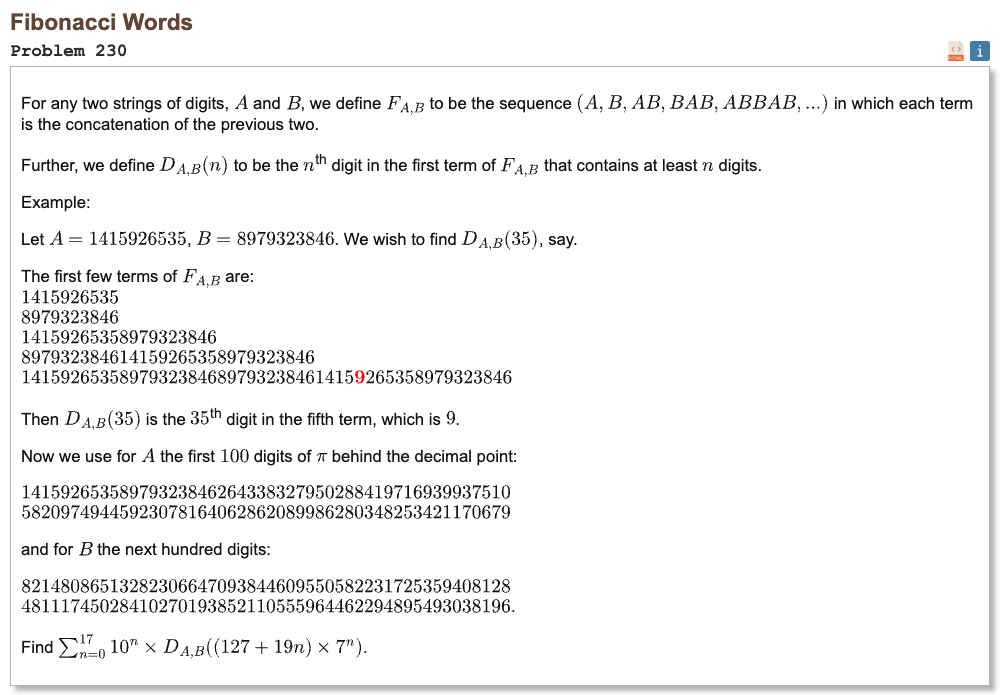

## Initial approach

* take a as the first 100 digits of pi after the decimal point, and b as the next 100 digits
* build a fibonacci like list of word lengths, because each new word is just the previous two glued together
* for a requested position n, jump to the first word whose length is at least n
* find the nth digit without building the huge word by repeatedly deciding whether n lies in the left part or the right part
* each decision shrinks the problem to an earlier word, so it becomes very fast even for extremely large n
* do this digit lookup for the 18 special positions given in the problem, then combine the digits into one final number 

In [1]:
import math

PI_DIGITS_1_TO_200 = (
    "14159265358979323846264338327950288419716939937510"
    "58209749445923078164062862089986280348253421170679"
    "82148086513282306647093844609550582231725359408128"
    "48111745028410270193852110555964462294895493038196"
)

A = PI_DIGITS_1_TO_200[:100]
B = PI_DIGITS_1_TO_200[100:200]

def build_lengths(max_n, base_len=100):
    lengths = [0, base_len, base_len]
    k = 3
    while lengths[-1] < max_n:
        lengths.append(lengths[k - 2] + lengths[k - 1])
        k += 1
    return lengths

def digit_at(n, A, B, lengths):
    k = 1
    while lengths[k] < n:
        k += 1
    while k > 2:
        left_len = lengths[k - 2]
        if n <= left_len:
            k = k - 2
        else:
            n -= left_len
            k = k - 1
    s = A if k == 1 else B
    return int(s[n - 1])

def solve():
    max_n = max((127 + 19 * i) * (7 ** i) for i in range(18))
    lengths = build_lengths(max_n, base_len=len(A))

    total = 0
    for i in range(18):
        n = (127 + 19 * i) * (7 ** i)
        d = digit_at(n, A, B, lengths)
        total += (10 ** i) * d
    return total

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 850481152593119296
CPU times: user 111 μs, sys: 3 μs, total: 114 μs
Wall time: 114 μs
